## Logistic regression


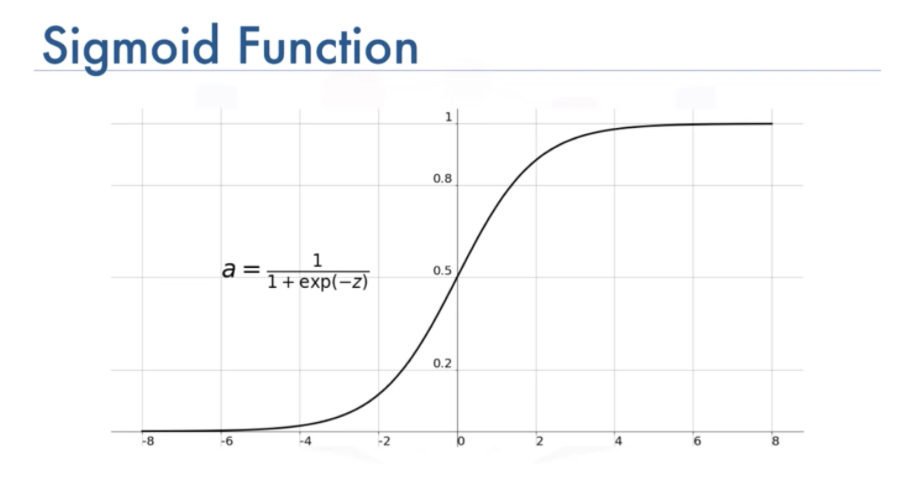

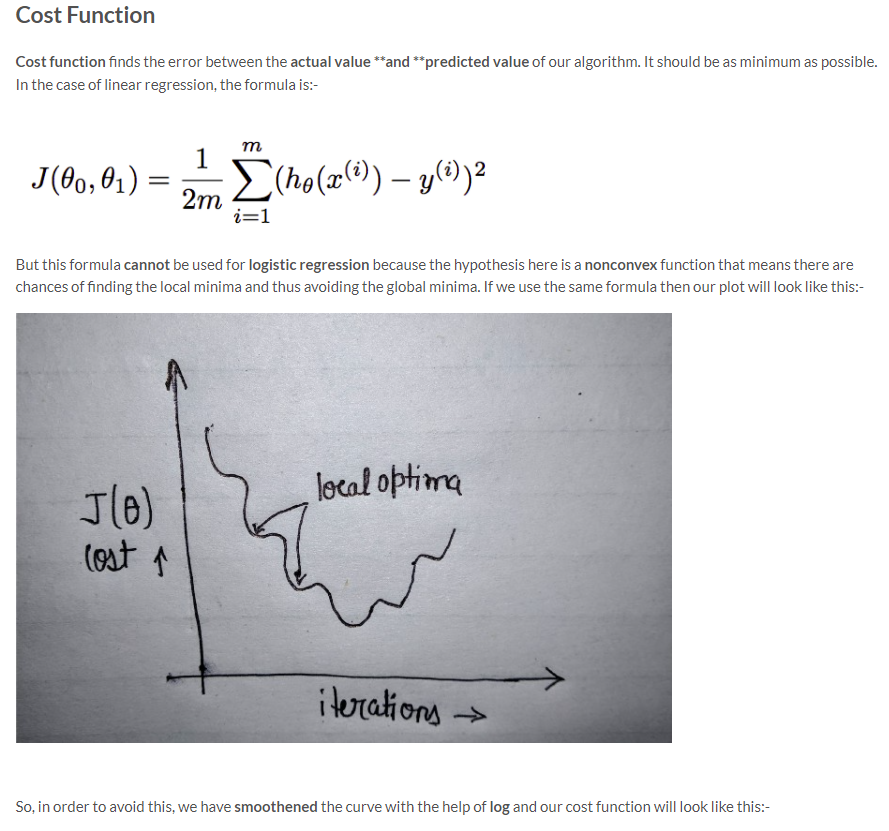

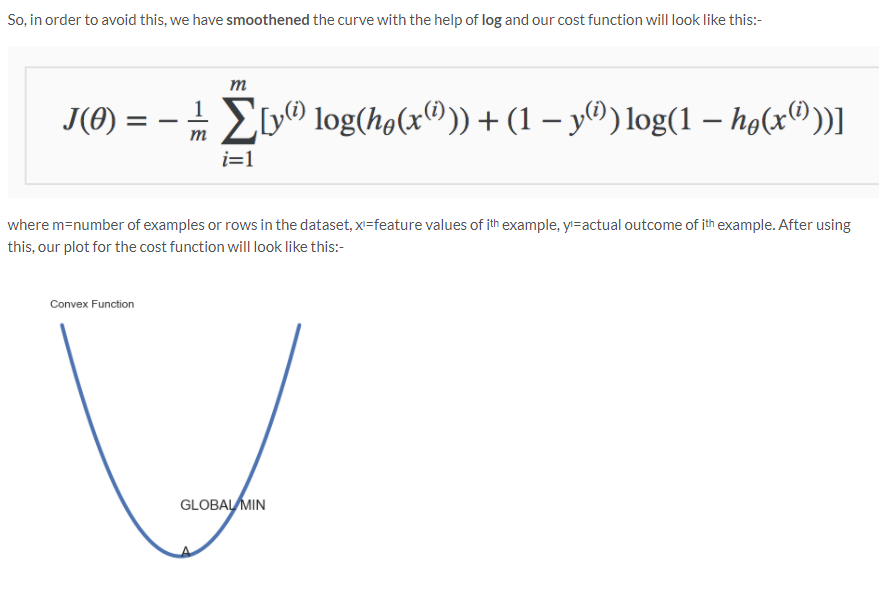

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('lrdata.txt')

In [3]:
df

,X1,X2,Y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,-0.242069,1
9,7.673756,3.508563,1


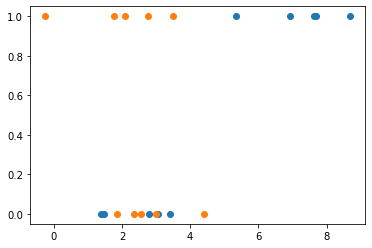

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['X1'],df['Y'])
plt.scatter(df['X2'],df['Y'])
plt.show()

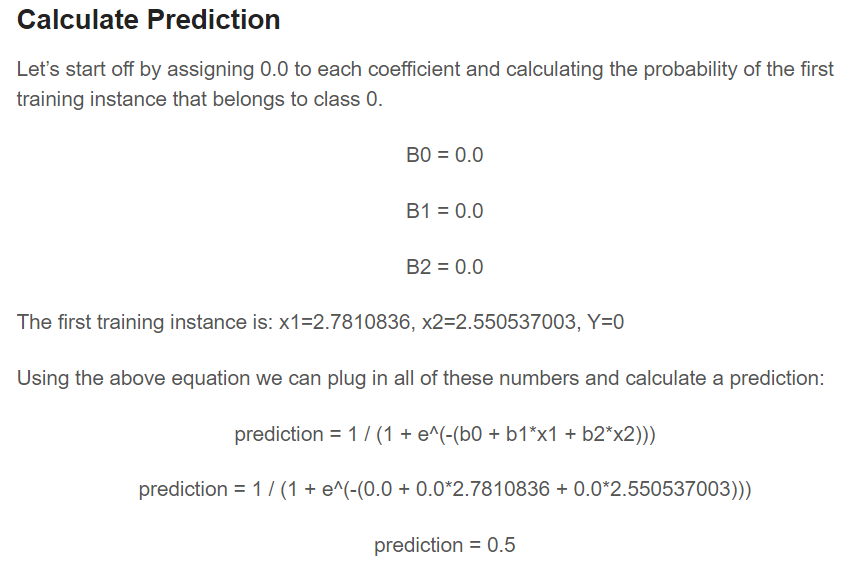

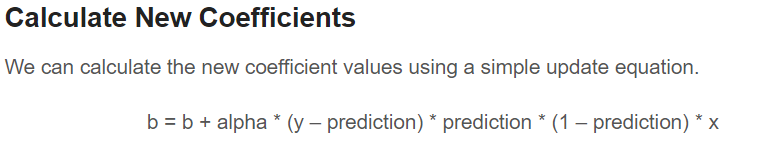

In [5]:
def logistic_regression (l,data): # m = slope, b = intercept, l = learning rate for 1 independent variable
    b0 = 0 # intercept
    b1 = 0 #x1
    b2 = 0 #x2
    
    b_0 = 0 #intercept
    b_1 = 0 #x1
    b_2 = 0 #x2
     
    col = list(data.columns)
    n = len(data)
    
    for i in range(len(data)):
        
        x1 =  data[col[0]].iloc[i] # iterating through rows
        x2 =  data[col[1]].iloc[i] # iterating through rows
        y =  data[col[2]].iloc[i] # iterating through rows
        
        prediction = 1 / (1 + np.exp(-(b0 + b1*x1 + b2*x2))) #sigmoid function
        
        dLoss_dLogistic = (-y/prediction) + ((1-y)/(1-prediction))
        dLogistic_dLinear = prediction*(1-prediction)
        
        b_0 += -(dLoss_dLogistic * dLogistic_dLinear) #intercept, adding all derivative  
        b_1 += -(dLoss_dLogistic * dLogistic_dLinear * x1) #attribute 1, adding all derivative
        b_2 += -(dLoss_dLogistic * dLogistic_dLinear * x2)  #attribute 1, adding all derivative
        
        
    b0 = b0 + l * (1/n) * b_0
    b1 = b1 + l * (1/n) * b_1
    b2 = b2 + l * (1/n) * b_2
    return(b0,b1,b2)

In [6]:
epoch = 250
for i in range(epoch):
    k = logistic_regression(0.01,df) #0.001 inaccurate, #0.1 inaccurate

In [7]:
k #estimates

(0.0, 0.012068233562500003, -0.0021415174309499995)

In [8]:
col = list(df.columns)
y_p = []
for i in range(len(df)):
    x1 =  df[col[0]].iloc[i] # iterating through rows
    x2 =  df[col[1]].iloc[i] # iterating through rows
    y =  df[col[2]].iloc[i] # iterating through rows

    prediction = 1 / (1 + np.exp(-(k[0] + k[1]*x1 + k[2]*x2))) #sigmoid function
    y_p.append(prediction)

In [9]:
y_p

[0.5070247244966398,
 0.5031567920544183,
 0.5078911433418758,
 0.5031972754682935,
 0.5076349128331712,
 0.5215221480488351,
 0.5149656074270316,
 0.5199271270163281,
 0.526279604129713,
 0.5212609311770469]

In [10]:
true = list(df['Y'])

In [11]:
for i in range(len(y_p)):
    if y_p[i] < 0.51:
     print (0,true[i])
    else:
        print (1,true[i])

0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
